In [23]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [24]:
################## IMPORT DATA ##########################
data = pd.read_csv('allvariables2.csv')   # data prepared by Carol Zhang

In [25]:
tots = pd.Series(data['TOTAL A']+data['TOTAL B'],name='total cases')
data['FLU']=data['FLU'].replace('<1',0)

# data['CC']=data['CC'].replace('<1',0)
# data['FLU_SYMP']=data['FLU_SYMP'].replace('<1',0)
# data['GRIPE']=data['GRIPE'].replace('<1',0)
# data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
# data['INFL']=data['INFL'].replace('<1',0)
# data['OSELT']=data['OSELT'].replace('<1',0)
# data['PREV']=data['PREV'].replace('<1',0)
# data['VACC']=data['VACC'].replace('<1',0)

for column in data:
    data[column] = data[column].replace('<1',0)
    data[column]=data[column].astype(float)

data['SUM'] = data['CC']+data['COUGH']+data['FLU_SYMP']+data['FLU']+data['GRIPE']+data['INF_SYMP']+data['INFL']+data['OSELT']+data['PREV']+data['VACC']
data['AVG'] = data['SUM']/10

df = pd.Series()
for i in range(len(data)):
    if data['WEEK'].iloc[i]<=16:
        df=df.append(pd.Series(True))
    elif data['WEEK'].iloc[i]>=40:
        df=df.append(pd.Series(True))
    else:
        df=df.append(pd.Series(False))

df.reset_index(drop=True,inplace=True)
data['SZN']=df
data['SZN'] = data['SZN'].replace(True,1)
data['SZN'] = data['SZN'].replace(False,0)
data

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN
0,14.0,2004.0,1.0,6936.0,12.427900,853.0,9.0,76.0,65.0,55.0,21.0,25.0,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0
1,15.0,2004.0,2.0,5411.0,9.332840,500.0,5.0,69.0,56.0,39.0,16.0,19.0,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0
2,16.0,2004.0,3.0,4329.0,6.006010,257.0,3.0,63.0,55.0,31.0,14.0,31.0,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0
3,17.0,2004.0,4.0,4166.0,3.984640,163.0,3.0,59.0,49.0,28.0,16.0,15.0,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0
4,18.0,2004.0,5.0,3661.0,2.922700,105.0,2.0,50.0,49.0,20.0,16.0,15.0,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0
5,19.0,2004.0,6.0,3530.0,1.841360,60.0,5.0,56.0,50.0,26.0,17.0,30.0,34.0,15.0,2.0,100.0,1.0,331.0,33.1,1.0
6,20.0,2004.0,7.0,3136.0,1.785710,48.0,8.0,45.0,49.0,21.0,14.0,35.0,17.0,13.0,2.0,66.0,1.0,263.0,26.3,1.0
7,21.0,2004.0,8.0,2559.0,1.484960,26.0,12.0,51.0,50.0,17.0,12.0,31.0,22.0,14.0,2.0,31.0,1.0,231.0,23.1,1.0
8,22.0,2004.0,9.0,2651.0,0.678989,10.0,8.0,43.0,48.0,10.0,9.0,12.0,56.0,11.0,1.0,0.0,1.0,191.0,19.1,1.0
9,23.0,2004.0,10.0,2369.0,0.590967,8.0,6.0,44.0,41.0,11.0,6.0,24.0,0.0,9.0,2.0,0.0,1.0,138.0,13.8,1.0


In [26]:
################# SHIFTING DATA ###############
a = 14 # number of weeks to shift by
temp1 = data[['YEAR','WEEK','TOTAL SPECIMENS','PERCENT POSITIVE','TOTAL A','TOTAL B','SZN']]
temp2 = data[['CC','COUGH','FLU_SYMP','FLU','GRIPE','INF_SYMP','INFL','OSELT','PREV','VACC','SUM','AVG']]
temp2 = temp2[a:]
temp1 = temp1[:(809-a)]
print(len(temp2))
print(len(temp1))

795
795


In [27]:
shifted = pd.concat([temp1,temp2],axis=1)


In [28]:
shifted = shifted[a:(809-a)]
shifted.head()

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,SZN,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG
14,2004.0,15.0,1564.0,0.959079,3.0,12.0,1.0,37.0,47.0,8.0,4.0,27.0,36.0,8.0,0.0,0.0,0.0,167.0,16.7
15,2004.0,16.0,1449.0,1.656310,13.0,11.0,1.0,39.0,46.0,16.0,6.0,14.0,16.0,8.0,1.0,0.0,1.0,147.0,14.7
16,2004.0,17.0,1377.0,0.798838,4.0,7.0,0.0,36.0,46.0,11.0,5.0,16.0,24.0,7.0,1.0,0.0,1.0,147.0,14.7
17,2004.0,18.0,1298.0,0.693374,3.0,6.0,0.0,35.0,44.0,7.0,4.0,27.0,16.0,5.0,1.0,0.0,1.0,140.0,14.0
18,2004.0,19.0,1241.0,0.161160,0.0,2.0,0.0,38.0,48.0,7.0,4.0,23.0,16.0,6.0,1.0,31.0,1.0,175.0,17.5


In [29]:
shifted.to_csv('shift14.csv')

a = 3
RMSE
2.252317900823889
Average % Err:


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


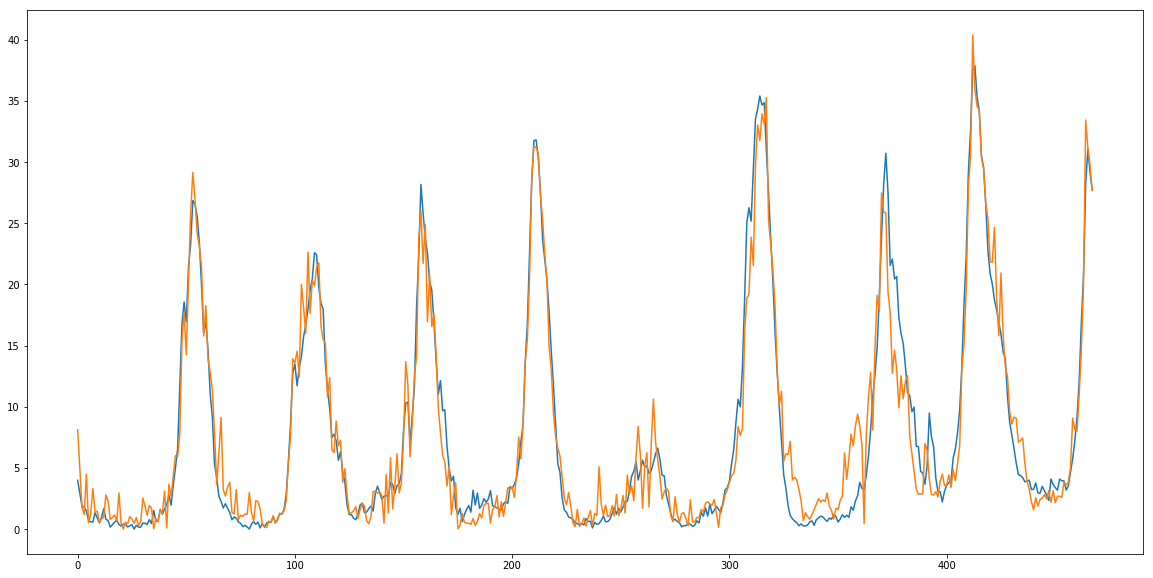

In [79]:
shifted=shifted[shifted['YEAR']!=2009]
shifted.reset_index(drop=True,inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

fig = plt.figure(figsize=(20,10))
#data['FLU'] = data['FLU'].replace('<1',0)
#dat = data[data['YEAR']==2004].append(data[data['YEAR']==2005]).append(data[data['YEAR']==2006])

# data_train, data_val = train_test_split(shifted, test_size = 0.20, random_state = 0)

y_train = shifted['PERCENT POSITIVE']
# y_val = data_val['PERCENT POSITIVE']

X_train = shifted[['COUGH','FLU','GRIPE','INF_SYMP','INFL','OSELT','VACC','WEEK']]
# X_val = data_val[['COUGH','FLU','GRIPE','INF_SYMP','INFL','OSELT','VACC','WEEK']]

X_test = X_train.iloc[469:625]
y_test = y_train.iloc[469:625]
X_legit = X_train.iloc[626:]
y_legit = y_train.iloc[626:]
X_train = X_train.iloc[0:468]
y_train = y_train.iloc[0:468]

from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(kernel='poly',degree=3)
#clf = ElasticNet()  #<<<<<<<#################################################################################
# clf = RandomForestRegressor(max_depth=2)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])
    if y_train_predict[i]>=100:
        y_train_predict[i]=100

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())
print('a = ' + str(a))
print('RMSE')
train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict),'percent err': abs(100*(y_train_predict-y_train)/y_train )}
print(train_rmse)
print("Average % Err:")
train_compare = pd.DataFrame(train_deeta)

plt.plot(np.arange(0,len(train_compare)),train_compare['true'])
plt.plot(np.arange(0,len(train_compare)),train_compare['pred'])


RMSE
29.807969733396956
Average % Err:


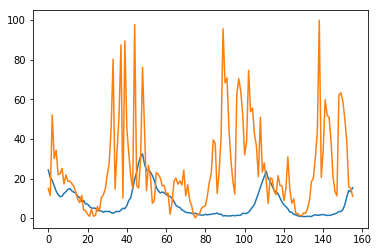

In [80]:
y_test = np.array(y_test).reshape(len(y_test))

y_test_predict = clf.predict(X_test).reshape(len(X_test))
for i in range(len(y_test_predict)):
    if y_test_predict[i]<0.0:
        y_test_predict[i]=abs(y_test_predict[i])
    while y_test_predict[i]>=100:
        y_test_predict[i]=y_test_predict[i]/10

test_rmse = np.sqrt(((y_test-y_test_predict)**2).mean())
print('RMSE')
test_deeta = {'true': y_test,"pred": y_test_predict,"error": abs(y_test-y_test_predict),'percent err': abs(100*(y_test_predict-y_test)/y_test )}
print(test_rmse)
print("Average % Err:")
test_compare = pd.DataFrame(test_deeta)

plt.plot(np.arange(0,len(test_compare)),test_compare['true'])
#print(test_compare['pred'])
plt.plot(np.arange(0,len(test_compare)),test_compare['pred'])

RMSE
495.13597521940426
Average % Err:


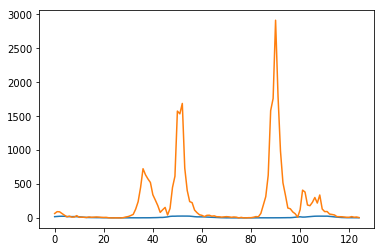

In [36]:
y_test = np.array(y_legit).reshape(len(y_legit))

y_test_predict = clf.predict(X_legit).reshape(len(X_legit))
for i in range(len(y_test_predict)):
    if y_test_predict[i]<0.0:
        y_test_predict[i]=abs(y_test_predict[i])

test_rmse = np.sqrt(((y_test-y_test_predict)**2).mean())
print('RMSE')
test_deeta = {'true': y_test,"pred": y_test_predict,"error": abs(y_test-y_test_predict),'percent err': abs(100*(y_test_predict-y_test)/y_test )}
print(test_rmse)
print("Average % Err:")
test_compare = pd.DataFrame(test_deeta)

plt.plot(np.arange(0,len(test_compare)),test_compare['true'])
plt.plot(np.arange(0,len(test_compare)),test_compare['pred'])

RMSE
288.23074954996764
Average % Err:


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


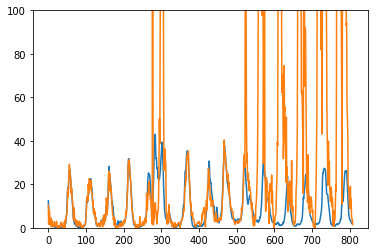

In [39]:
y_legit=data['PERCENT POSITIVE']
X_legit = data[['COUGH','FLU','GRIPE','INF_SYMP','INFL','OSELT','VACC','WEEK']]

y_test = np.array(y_legit).reshape(len(y_legit))

y_test_predict = clf.predict(X_legit).reshape(len(X_legit))
for i in range(len(y_test_predict)):
    if y_test_predict[i]<0.0:
        y_test_predict[i]=abs(y_test_predict[i])

test_rmse = np.sqrt(((y_test-y_test_predict)**2).mean())
print('RMSE')
test_deeta = {'true': y_test,"pred": y_test_predict,"error": abs(y_test-y_test_predict),'percent err': abs(100*(y_test_predict-y_test)/y_test )}
print(test_rmse)
print("Average % Err:")
test_compare = pd.DataFrame(test_deeta)

plt.ylim(0,100)

plt.plot(np.arange(0,len(test_compare)),test_compare['true'])
plt.plot(np.arange(0,len(test_compare)),test_compare['pred'])

In [81]:
shifted

,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,SZN,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG
0,2004.0,4.0,4166.0,3.984640,163.0,3.0,1.0,59.0,49.0,28.0,16.0,15.0,35.0,16.0,6.0,33.0,1.0,258.0,25.8
1,2004.0,5.0,3661.0,2.922700,105.0,2.0,1.0,50.0,49.0,20.0,16.0,15.0,26.0,16.0,5.0,0.0,1.0,198.0,19.8
2,2004.0,6.0,3530.0,1.841360,60.0,5.0,1.0,56.0,50.0,26.0,17.0,30.0,34.0,15.0,2.0,100.0,1.0,331.0,33.1
3,2004.0,7.0,3136.0,1.785710,48.0,8.0,1.0,45.0,49.0,21.0,14.0,35.0,17.0,13.0,2.0,66.0,1.0,263.0,26.3
4,2004.0,8.0,2559.0,1.484960,26.0,12.0,1.0,51.0,50.0,17.0,12.0,31.0,22.0,14.0,2.0,31.0,1.0,231.0,23.1
5,2004.0,9.0,2651.0,0.678989,10.0,8.0,1.0,43.0,48.0,10.0,9.0,12.0,56.0,11.0,1.0,0.0,1.0,191.0,19.1
6,2004.0,10.0,2369.0,0.590967,8.0,6.0,1.0,44.0,41.0,11.0,6.0,24.0,0.0,9.0,2.0,0.0,1.0,138.0,13.8
7,2004.0,11.0,2239.0,0.580616,11.0,2.0,1.0,45.0,49.0,12.0,7.0,22.0,17.0,9.0,1.0,64.0,1.0,227.0,22.7
8,2004.0,12.0,1801.0,1.332590,9.0,15.0,1.0,40.0,50.0,16.0,7.0,100.0,33.0,7.0,3.0,0.0,1.0,257.0,25.7
9,2004.0,13.0,1850.0,0.918919,8.0,9.0,1.0,43.0,46.0,11.0,6.0,37.0,16.0,8.0,1.0,0.0,1.0,169.0,16.9
